In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import bisect


from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)



#data= np.random.randn(100,2)

<Axes: >

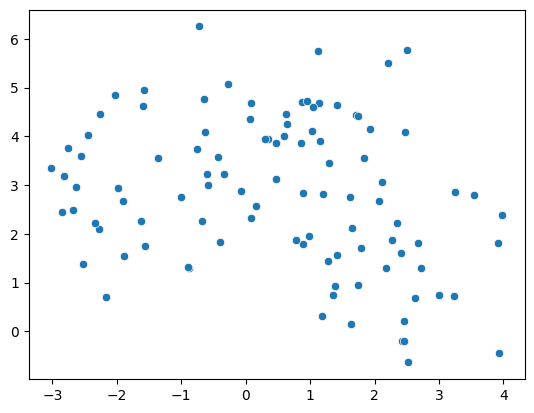

In [44]:
sns.scatterplot(x=data[:,0],y=data[:,1])

In [45]:
class Kmeans():

    """
    This class implements the Kmeans Algorithm with optional kmeans++ initialization.

    Input:
        - data (ndarray): The input data to be clustered. Each row represents a data point.
        - k (int): The number of clusters to form.
        - algorithm (str): 'kmeans++' for KMeans++ initialization or anything else for random initialization.
    
    Output:
        - Returns a list of cluster indices, where each index corresponds to the assigned cluster for each data point.
    """

    def __init__(self,data,k,algorithm):
        self.data=data
        self.n=len(self.data)
        self.k=k
        self.prev_cluster=[0 for i in range(0,n)]
        self.algo=algorithm

        if self.algo=='kmeans++':
            self.centroids=self.kmeansplus()
            print(self.centroids)

        else:
            self.centroids=data[np.random.choice(np.arange(0,self.n),self.k)]

    @staticmethod
    def distance(point,centroid):
        return np.linalg.norm(point-centroid)

    def assign(self,point):
        min_dis=float('inf')
        idx=0
        for i,y in enumerate(self.centroids):
            if Kmeans.distance(point,y)<min_dis:
                min_dis=Kmeans.distance(point,y)
                idx=i
        
        return idx
    
    def kmeansplus(self):
        centroid=[]
        
        first_c=np.random.choice(np.arange(0,self.n),1)
        centroid.append(self.data[first_c[0]])

        for k in range(1,self.k):
            dist=np.zeros(len(self.data))
            for point in range(0,len(self.data)):
                min_d=float('inf')
                for c in centroid:
                    d=Kmeans.distance(self.data[point],c)
                    min_d=min(min_d,d)

                dist[point]=min_d**2

            probs=dist/np.sum(dist)
            probs=np.cumsum(probs)
            random_no=np.random.rand()

            ind=bisect.bisect_left(probs,random_no)
            centroid.append(self.data[ind])

        return np.array(centroid)





    def main(self):
        for i in range(0,self.n):
            cluster_idx=[]
            for j in self.data:
                cluster_idx.append(self.assign(j))
            cluster_idx=np.array(cluster_idx)

            if (cluster_idx==self.prev_cluster).all():
                break
            else:
                self.prev_cluster=cluster_idx

            
            for i in range(0,self.k):
                    point_cluster=np.where(cluster_idx==i)
                    point_cluster=self.data[point_cluster]
                    self.centroids[i] = np.mean(point_cluster, axis=0)

        return cluster_idx
        







In [46]:

k=4
km=Kmeans(data,k,'kmeans++')
cluster_idx=km.main()

[[ 1.42013331  4.63746165]
 [ 1.74371499  0.953829  ]
 [-2.63128735  2.97004734]
 [-1.59514562  4.63122498]]


<Axes: >

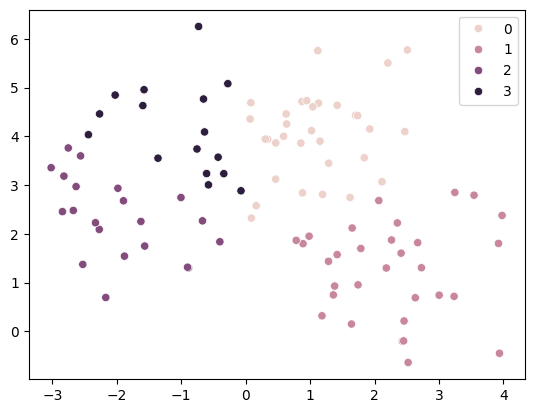

In [47]:
sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster_idx)